In [2]:
%load_ext autoreload
%autoreload 2

# Comparing methods for computing formation energies

This notebook compares DFT (PBE-D3 level) and DREIDING forcefield approaches for computing formation energies from our manuscript to one another and to experimentally measured formation enthalpies from Piccione et al., JPCB (2000), 10001-10011 DOI:[10.1021/jp002148a](https://doi.org/10.1021/jp002148a).

## Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from analysis_functions import my_mpl_settings

In [4]:
my_mpl_settings()

## Comparison

In [5]:
comp_df = pd.read_csv("../data/dft_dreiding_formation_energy.csv")
expt_df = pd.read_csv("../data/expt_dft_dreiding_formation_comparison.csv")

In [6]:
comp_df.head()

,dft_job_id,dft_crystal_id,framework,stoichiometry,Si_count,dft_formation_energy,dreiding_formation_energy
0,35296704,59490944,PUN,O72Si36,36,19.520386,-26.920591
1,78516488,137469541,ETV,O28Si14,14,12.128671,59.175868
2,35323177,59490878,IWV-supercell,O304Si152,152,13.960178,NaN
3,35296586,59490777,AET,O144Si72,72,11.893431,-20.751184
4,35296599,59490796,ATS,O48Si24,24,11.933595,-37.247341


In [7]:
expt_df.head()

,framework,expt_form_enthalpy,dft_formation_energy,dreiding_formation_energy
0,MEL,8.2,10.365870,-4.592132
1,MWW,10.4,12.352673,6.187546
2,IFR,10.0,11.165003,-8.676535
3,ITE,10.1,11.794098,-1.003849
4,AST,10.9,14.138417,-21.397560


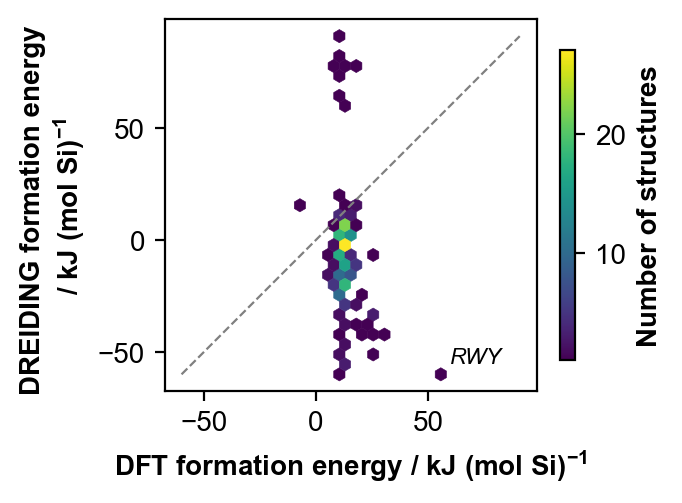

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))

form_min = min(comp_df["dreiding_formation_energy"].min(), comp_df["dft_formation_energy"].min())
form_max = max(comp_df["dreiding_formation_energy"].max(), comp_df["dft_formation_energy"].max())
ax.hexbin(
    comp_df["dft_formation_energy"],
    comp_df["dreiding_formation_energy"],
    gridsize=30,
    cmap="viridis",
    mincnt=1,
    linewidths=0.2,
    extent=[form_min, form_max, form_min, form_max],
)
ax.plot(
    [form_min, form_max],
    [form_min, form_max],
    color="gray",
    linestyle="--",
    linewidth=0.8,
)
ax.set_xlabel(r"DFT formation energy / kJ (mol Si)$^{\mathdefault{-1}}$", fontweight="bold")
ax.set_ylabel(
    "DREIDING formation energy \n/" r" kJ (mol Si)$^{\mathdefault{-1}}$",
    fontweight="bold",
)

# annotate the points with DFT formation energies < 0 and > 50
for _, row in comp_df.iterrows():
    if row["dft_formation_energy"] > 50:
        ax.annotate(
            row["framework"],
            (row["dft_formation_energy"] + 5, row["dreiding_formation_energy"] + 5),
            fontsize=8,
            fontstyle="italic",
        )

cbar = fig.colorbar(ax.collections[0], ax=ax, shrink=0.67)
cbar.set_label("Number of structures", fontweight="bold")

ax.set_box_aspect(1)
# fig.savefig("dft_vs_dreiding_formation_energy.svg", dpi=300)

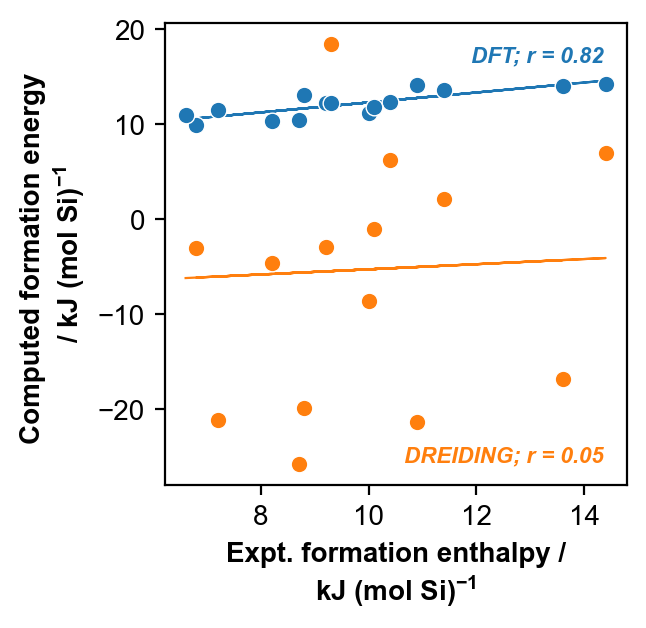

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))

# compute the correlation coefficient
correlation = expt_df["expt_form_enthalpy"].corr(expt_df["dft_formation_energy"])
dreid_corr = expt_df["expt_form_enthalpy"].corr(expt_df["dreiding_formation_energy"])

ax.scatter(
    expt_df["expt_form_enthalpy"],
    expt_df["dft_formation_energy"],
    edgecolors="white",
    linewidths=0.5,
    zorder=4,
)
ax.scatter(
    expt_df["expt_form_enthalpy"],
    expt_df["dreiding_formation_energy"],
    edgecolors="white",
    linewidths=0.5,
    zorder=3,
)
# plot the line of best fit
m, c = np.polyfit(expt_df["expt_form_enthalpy"], expt_df["dft_formation_energy"], 1)
ax.plot(
    expt_df["expt_form_enthalpy"],
    m * expt_df["expt_form_enthalpy"] + c,
    linewidth=0.8,
    zorder=2,
)
m, c = np.polyfit(expt_df["expt_form_enthalpy"], expt_df["dreiding_formation_energy"], 1)
ax.plot(
    expt_df["expt_form_enthalpy"],
    m * expt_df["expt_form_enthalpy"] + c,
    linewidth=0.8,
    zorder=1,
)
ax.set_xlabel(
    "Expt. formation enthalpy /\n" r"kJ (mol Si)$^{\mathdefault{-1}}$",
    fontweight="bold",
)
ax.set_ylabel(
    "Computed formation energy \n/ " r"kJ (mol Si)$^{\mathdefault{-1}}$",
    fontweight="bold",
)
ax.annotate(
    f"DFT; r = {correlation:.2f}",
    (0.95, 0.95),
    horizontalalignment="right",
    verticalalignment="top",
    xycoords="axes fraction",
    fontsize=8,
    color="C0",
    fontweight="bold",
    fontstyle="italic",
)
ax.annotate(
    f"DREIDING; r = {dreid_corr:.2f}",
    (0.95, 0.05),
    horizontalalignment="right",
    xycoords="axes fraction",
    fontsize=8,
    color="C1",
    fontweight="bold",
    fontstyle="italic",
)
ax.set_box_aspect(1)
# fig.savefig("expt_vs_computed_formation_energy.svg", dpi=300)